## Dataset v2.0 Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
from importlib import reload
import seaborn as sns
import libs.dataset_rendering as rend

In [36]:
df = pd.read_csv('./datasets/asag_v2.csv', index_col=False, sep='~')
df.head(2)
print('Total responses: {}'.format(len(df)))

# Save table
display(df.head(5))

Total responses: 2442


ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   
2  1.1    1    1   What is the role of a prototype program in pr...   
3  1.1    1    1   What is the role of a prototype program in pr...   
4  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   
2   To simulate the behaviour of portions of the ...   
3   To simulate the behaviour of portions of the ...   
4   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    3.5  
1   To simulate portions of the desired final pro...    5.0  
2   A prototype program simulates the behaviors o...    4.0  
3   Defined in the Specification phase a prototyp...    5.0  
4   It is used to let the users have a first idea...    3.0

<Figure size 800x640 with 0 Axes>

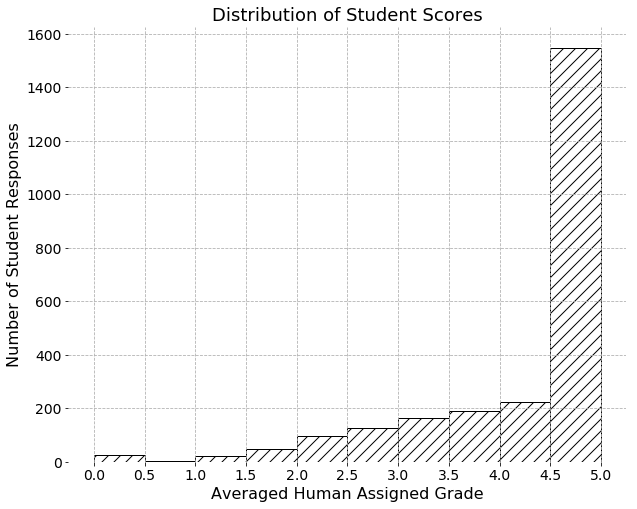

In [69]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

# Full Distribution of Scores
scores = df['Score']

reload(rend)
rend.render_histogram(scores,
                      title="Distribution of Student Scores",
                      xlabel="Averaged Human Assigned Grade",
                      ylabel="Number of Student Responses",
                      xticks=np.arange(0,5.1,step=0.5),
                      bins=10,
                      savefile="./renderings/dataset_v2_score_distribution")

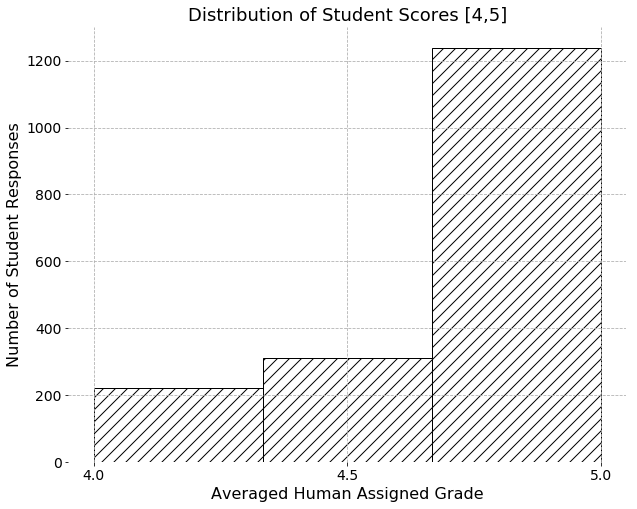

In [83]:
## Render 4,4.5,5 Distribution
scores4_5 = scores[scores >= 4]

rend.render_histogram(scores4_5,
                      title="Distribution of Student Scores [4,5]",
                      xlabel="Averaged Human Assigned Grade",
                      ylabel="Number of Student Responses",
                      xticks=np.arange(4,5.1,step=0.5),
                      bins=3,
                      savefile="./renderings/dataset_v2_score_dist_4-5")

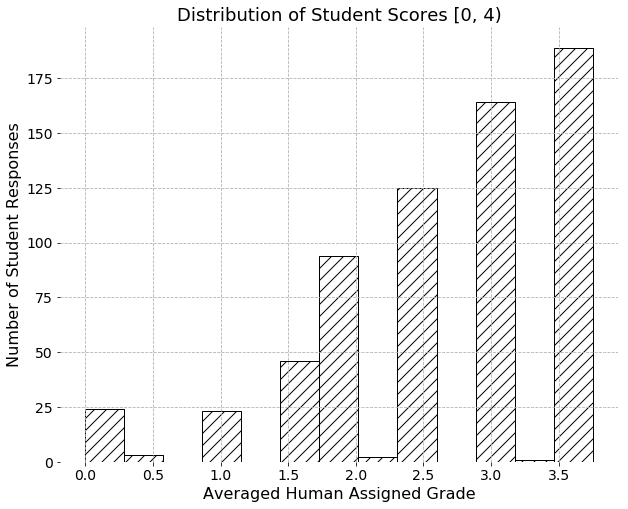

In [61]:
scores_0_3 = scores[scores < 4]
bins = len(np.unique(scores_0_3))

rend.render_histogram(scores_0_3,
                      title="Distribution of Student Scores [0, 4)",
                      xlabel="Averaged Human Assigned Grade",
                      ylabel="Number of Student Responses",
                      xticks=np.arange(0, bins,step=0.5),
                      bins=bins,
                      savefile="./renderings/dataset_v2_score_dist_0-3.5")

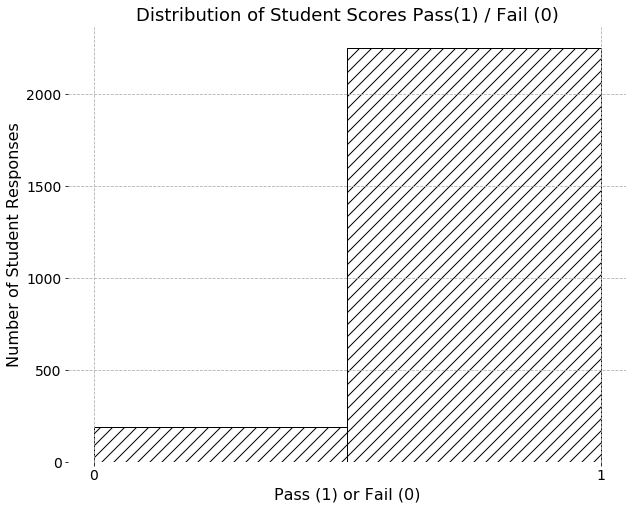

In [52]:
## Pass/Fail normalized Distribution

pass_fail_scores = scores.copy()

pass_fail_scores[pass_fail_scores <= 2] = 0
pass_fail_scores[pass_fail_scores > 2] = 1

reload(rend)
rend.render_histogram(pass_fail_scores,
                      title="Distribution of Student Scores Pass(1) / Fail (0)",
                      xlabel="Pass (1) or Fail (0)",
                      ylabel="Number of Student Responses",
                      xticks=[0,1],
                      bins=2,
                      savefile="./renderings/dataset_v2_score_dist_pass_fail")

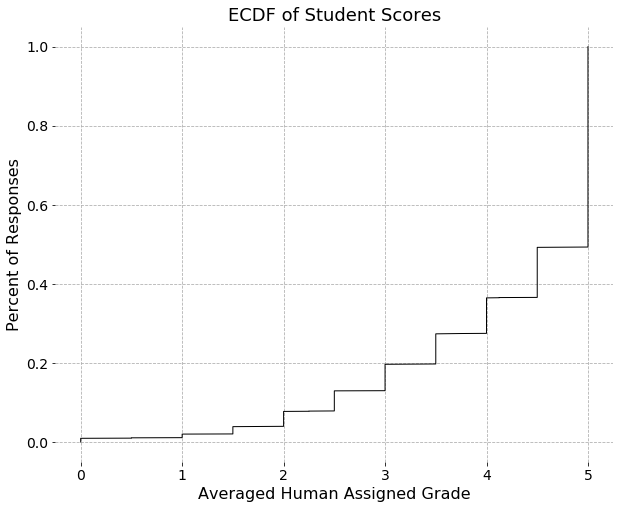

In [86]:
reload(rend)
rend.render_ecdf(scores,
                title="ECDF of Student Scores",
                xlabel="Averaged Human Assigned Grade",
                ylabel="Percent of Responses",
                savefile="./renderings/dataset_v2_ecdf")

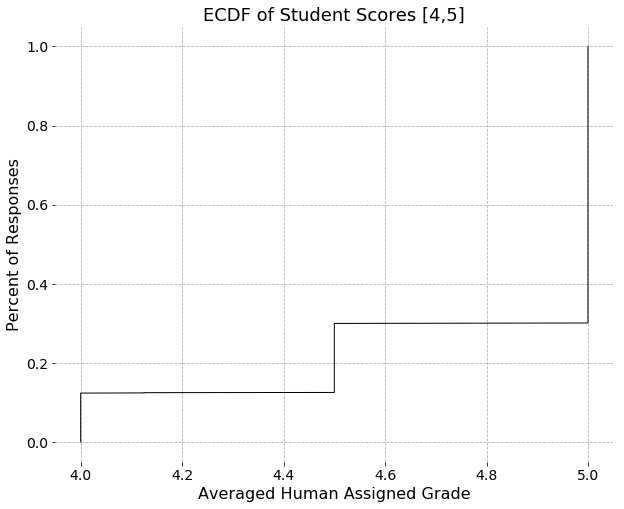

In [87]:
# ECDF for [4,5] Scores
rend.render_ecdf(scores4_5,
                title="ECDF of Student Scores [4,5]",
                xlabel="Averaged Human Assigned Grade",
                ylabel="Percent of Responses",
                savefile="./renderings/dataset_v2_ecdf_4-5")

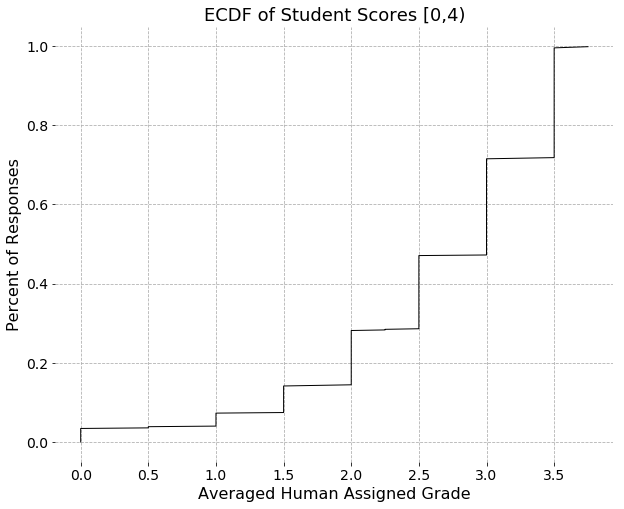

In [88]:
# ECDF for [0,4) Scores
rend.render_ecdf(scores_0_3,
                title="ECDF of Student Scores [0,4)",
                xlabel="Averaged Human Assigned Grade",
                ylabel="Percent of Responses",
                savefile="./renderings/dataset_v2_ecdf_0-4")

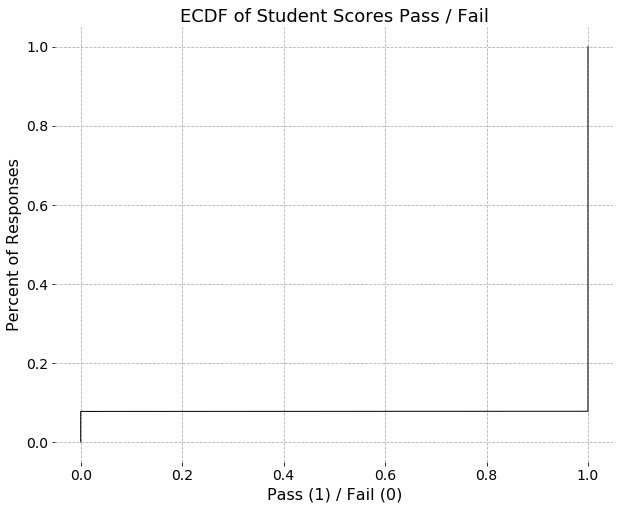

In [89]:
# ECDF for Pass / Fail Data
rend.render_ecdf(pass_fail_scores,
                title="ECDF of Student Scores Pass / Fail",
                xlabel="Pass (1) / Fail (0)",
                ylabel="Percent of Responses",
                savefile="./renderings/dataset_v2_ecdf_pass_fail")